<a href="https://colab.research.google.com/github/rtajeong/AI_Cluster/blob/main/lab_59_mnist_keras_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras with MNIST dataset

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Data load

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [3]:
train_images[0].max()   # 8-bit

255

In [4]:
type(train_images), type(train_images[0]), train_images[0].shape

(numpy.ndarray, numpy.ndarray, (28, 28))

In [5]:
type(train_labels), type(train_labels[0]), train_labels[0]

(numpy.ndarray, numpy.uint8, 5)

In [6]:
train_images.shape, train_labels.dtype

((60000, 28, 28), dtype('uint8'))

## MNIST image and Preprocessing

<function matplotlib.pyplot.show>

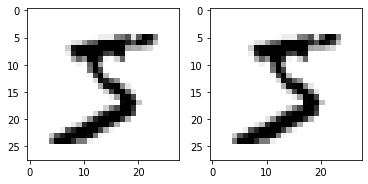

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(1,2,1)
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.subplot(1,2,2)
plt.imshow(train_images[0]/255, cmap=plt.cm.binary)
plt.show

In [8]:
# just for checking
print(type(train_labels), train_labels[:10])
train_images.shape, train_labels.shape

<class 'numpy.ndarray'> [5 0 4 1 9 2 1 3 1 4]


((60000, 28, 28), (60000,))

In [9]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [10]:
train_images.shape, train_labels.shape

((60000, 28, 28, 1), (60000, 10))

In [11]:
print(train_labels[:10], type(train_labels), )

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] <class 'numpy.ndarray'>


## MLP

### Single flattened layer

In [12]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28*1))
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape((10000, 28*28*1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [13]:
# a single MLP layer

model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape = (28*28*1, )))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer= 'rmsprop',             # set up hyperparamers
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=30, batch_size=256, verbose=2)

test_loss, test_acc = model.evaluate(test_images, test_labels) # default batch size=32
print('test_acc = ',test_acc)

Epoch 1/30
235/235 - 3s - loss: 0.7650 - accuracy: 0.8201
Epoch 2/30
235/235 - 1s - loss: 0.3677 - accuracy: 0.8996
Epoch 3/30
235/235 - 1s - loss: 0.3223 - accuracy: 0.9104
Epoch 4/30
235/235 - 1s - loss: 0.3031 - accuracy: 0.9157
Epoch 5/30
235/235 - 1s - loss: 0.2918 - accuracy: 0.9187
Epoch 6/30
235/235 - 1s - loss: 0.2840 - accuracy: 0.9204
Epoch 7/30
235/235 - 1s - loss: 0.2785 - accuracy: 0.9220
Epoch 8/30
235/235 - 1s - loss: 0.2743 - accuracy: 0.9234
Epoch 9/30
235/235 - 1s - loss: 0.2710 - accuracy: 0.9244
Epoch 10/30
235/235 - 1s - loss: 0.2680 - accuracy: 0.9258
Epoch 11/30
235/235 - 1s - loss: 0.2655 - accuracy: 0.9266
Epoch 12/30
235/235 - 1s - loss: 0.2634 - accuracy: 0.9264
Epoch 13/30
235/235 - 1s - loss: 0.2617 - accuracy: 0.9279
Epoch 14/30
235/235 - 1s - loss: 0.2600 - accuracy: 0.9275
Epoch 15/30
235/235 - 1s - loss: 0.2585 - accuracy: 0.9285
Epoch 16/30
235/235 - 1s - loss: 0.2570 - accuracy: 0.9291
Epoch 17/30
235/235 - 1s - loss: 0.2561 - accuracy: 0.9297
Epoch 

(28, 28)


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

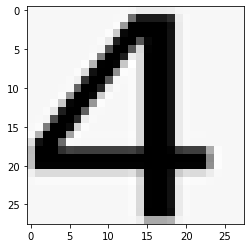

In [17]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
image = Image.open('num_4_thin.png' ).convert('LA')
image = ImageOps.grayscale(image)
image = np.asarray(image.resize((28,28)))
image = 255. - image
plt.imshow(image, cmap='Greys')
print(np.asarray(image).shape)
# model.predict(image.reshape(1, 28,28,1).astype('float64') / 255)
model.predict(image.reshape(1, 28*28))

### MLP with hidden layers

In [18]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (28*28*1, ))) # fully-connected
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='dense_1_input'), name='dense_1_input', description="created by layer 'dense_1_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_3/Softmax:0', description="created by layer 'dense_3'")


In [20]:
print(model.input_shape)
print(model.output_shape)
model.input

(None, 784)
(None, 10)


<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_1_input')>

In [21]:
model.layers[0].input, model.layers[0].output, model.layers[0].trainable

(<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_1_input')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_1')>,
 True)

In [22]:
model.compile(optimizer= 'rmsprop',             # set up hyperparamers
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=30, batch_size=200) 

Epoch 1/30
300/300 [==============================] - 2s 4ms/step - loss: 0.3631 - accuracy: 0.8969
Epoch 2/30
300/300 [==============================] - 1s 4ms/step - loss: 0.1549 - accuracy: 0.9544
Epoch 3/30
300/300 [==============================] - 1s 4ms/step - loss: 0.1086 - accuracy: 0.9676
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0834 - accuracy: 0.9746
Epoch 5/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0677 - accuracy: 0.9790
Epoch 6/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0561 - accuracy: 0.9825
Epoch 7/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0469 - accuracy: 0.9857
Epoch 8/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0389 - accuracy: 0.9881
Epoch 9/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0336 - accuracy: 0.9901
Epoch 10/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0279 - accuracy: 0.9915

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels) # default batch size=32
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1384 - accuracy: 0.9776
test_acc =  0.9775999784469604


## CNN 

In [25]:
# keras.layers.Conv2D(filters, kernel_size,...)
# - filters: the dimensionality of the output space (the number of output filters).
# - parameter 수: 입력채널수 X 필터폭 X 필터높이 X 출력채널수 
# - bias 도 고려

In [26]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [27]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
# print(model.output_shape)

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
print(model.output_shape)

model.summary()   

(None, 10)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)    

In [28]:
# number of parameters
# conv2d_1 : 3*3*1*32 + 32 = 320
# conv2d_2 : 3*3*32*64 + 64 = 18496
# conv2d_3 : 3*3*64*64 + 64 = 36928
# dense_6 : 3*3*64*10 + 10 = 5770

In [29]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [30]:
model.fit(train_images, train_labels, epochs=30, batch_size=200)

Epoch 1/30
300/300 [==============================] - 32s 13ms/step - loss: 0.3025 - accuracy: 0.9079
Epoch 2/30
300/300 [==============================] - 4s 12ms/step - loss: 0.0764 - accuracy: 0.9767
Epoch 3/30
300/300 [==============================] - 4s 12ms/step - loss: 0.0490 - accuracy: 0.9848
Epoch 4/30
300/300 [==============================] - 4s 12ms/step - loss: 0.0381 - accuracy: 0.9884
Epoch 5/30
300/300 [==============================] - 4s 12ms/step - loss: 0.0299 - accuracy: 0.9907
Epoch 6/30
300/300 [==============================] - 4s 12ms/step - loss: 0.0246 - accuracy: 0.9922
Epoch 7/30
300/300 [==============================] - 4s 12ms/step - loss: 0.0202 - accuracy: 0.9935
Epoch 8/30
300/300 [==============================] - 4s 12ms/step - loss: 0.0163 - accuracy: 0.9949
Epoch 9/30
300/300 [==============================] - 4s 12ms/step - loss: 0.0146 - accuracy: 0.9954
Epoch 10/30
300/300 [==============================] - 4s 12ms/step - loss: 0.0122 - accur

In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0534 - accuracy: 0.9917
test_acc =  0.9916999936103821


(28, 28)


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

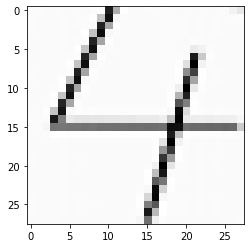

In [34]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
image = Image.open('num_4_thin.png' ).convert('LA')  # to gray
image = ImageOps.grayscale(image)
image = np.asarray(image.resize((28,28)))
image = 255. - image
plt.imshow(image, cmap='Greys')
print(np.asarray(image).shape)
# model.predict(image.reshape(1, 28,28,1).astype('float64') / 255)
model.predict(image.reshape(1, 28,28,1))

## Without Deep Learning

In [35]:
# just for reference
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28*1))
X = train_images.astype('float32')/255         # scaling
y = train_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45000, 784), (15000, 784), (45000,), (15000,))

In [37]:
clf = SGDClassifier(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9104666666666666


In [38]:
clf.predict(image.reshape(1, 28*28))  # wrong

array([3], dtype=uint8)